In [1]:
import random

import pandas as pd
from matplotlib import pyplot as plt

from Model.Inference import analyze_iou_across_images
from Visualizer.Model import display_best_grid_prediction
from Model.zoo import UNetModel1024
from Visualizer.Grid import display_grid_from_path

2025-07-20 17:20:35.188225: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 17:20:35.191055: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 17:20:35.198598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753046435.211364  118868 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753046435.215419  118868 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753046435.225396  118868 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
model = UNetModel1024(weights="../../Model/zoo/weights/unet-1024-5050.weights.h5")
model = model.load_model()
output_dir = "../../CROPS"
image_idx = 10
mask_threshold = 0.7
grid_range = (4, 6)
index_range = [random.randint(0, 797) for _ in range(50)]

2025-07-20 17:20:36.901969: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


2025-07-20 17:16:37.086225: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 536870912 exceeds 10% of free system memory.


Grid size 4x4: IoU = 0.7001


2025-07-20 17:16:38.591038: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 419430400 exceeds 10% of free system memory.
2025-07-20 17:16:38.739092: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 419430400 exceeds 10% of free system memory.
2025-07-20 17:16:43.871568: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 419430400 exceeds 10% of free system memory.
2025-07-20 17:16:45.197461: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 419430400 exceeds 10% of free system memory.


Grid size 5x5: IoU = 0.6988
Grid size 6x6: IoU = 0.7860

Best grid size: 6x6 with IoU = 0.7860
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


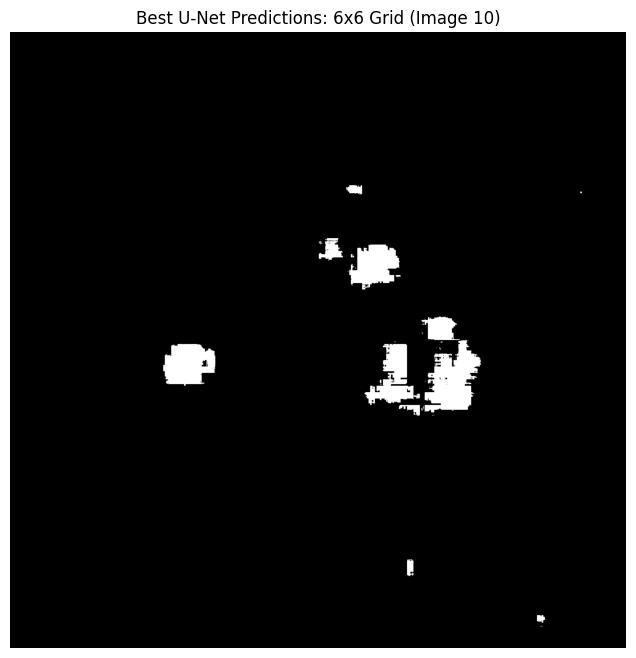

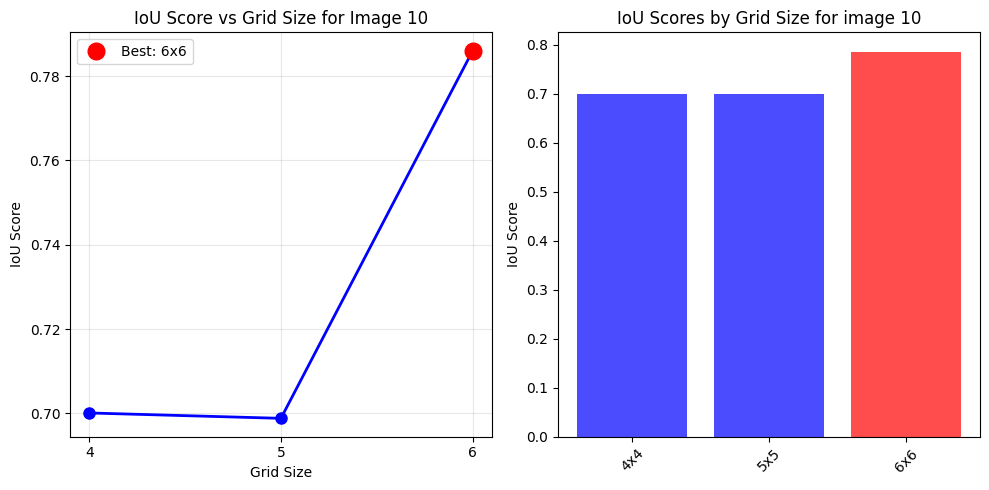

TypeError: display_grid_from_path() takes from 3 to 4 positional arguments but 5 were given

In [3]:

best_grid_size, iou_scores = display_best_grid_prediction(
    output_dir=output_dir,
    image_idx=image_idx,
    model=model,
    mask_threshold=mask_threshold,
    spacing=0,
    grid_range=grid_range
)

display_grid_from_path(output_dir, image_idx, best_grid_size, True, 0)
display_grid_from_path(output_dir, image_idx, best_grid_size, False, 0)

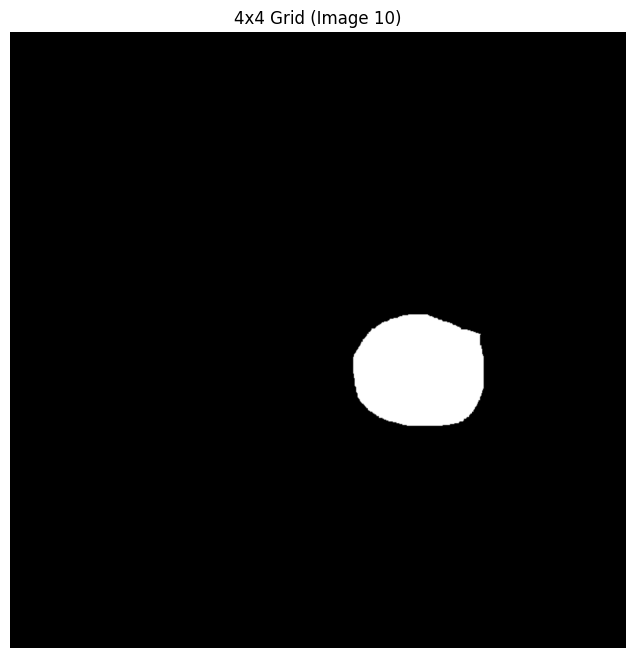

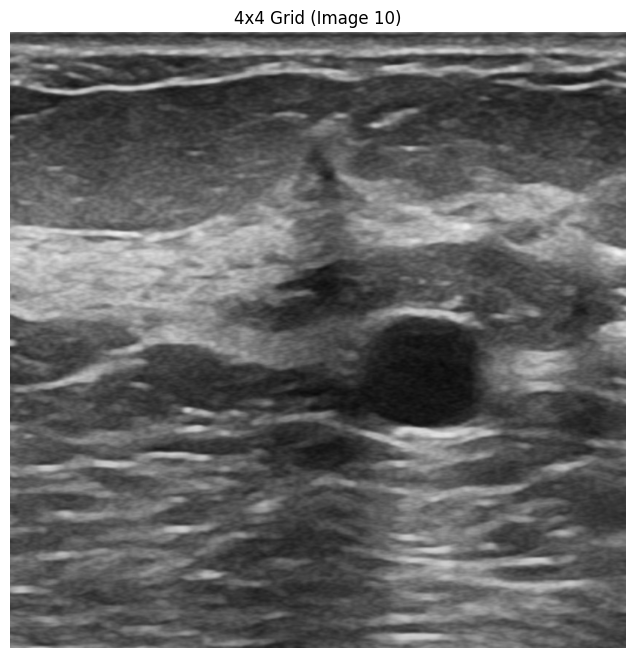

In [5]:
results = analyze_iou_across_images(
    output_dir=output_dir,
    model=model,
    mask_threshold=mask_threshold,
    grid_range=grid_range,
    index_range=index_range
)

Processing image 1/50... 

2025-07-20 17:21:27.509775: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 536870912 exceeds 10% of free system memory.


Grid size 4x4: IoU = 0.4666


2025-07-20 17:21:29.186553: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 419430400 exceeds 10% of free system memory.
2025-07-20 17:21:29.330535: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 419430400 exceeds 10% of free system memory.
2025-07-20 17:21:34.596363: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 419430400 exceeds 10% of free system memory.
2025-07-20 17:21:36.086988: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 419430400 exceeds 10% of free system memory.


Grid size 5x5: IoU = 0.6252
Grid size 6x6: IoU = 0.5239

Best grid size: 5x5 with IoU = 0.6252
✓ Best: 5x5 (IoU: 0.6252)
Processing image 2/50... Grid size 4x4: IoU = 0.7500


KeyboardInterrupt: 

In [69]:
def results_to_detailed_dataframe(results, index_range):
    """
    Create a more detailed DataFrame including all IoU scores by grid size.

    Args:
        results: Dictionary from analyze_iou_across_images function
        index_range: Original index range used in the analysis

    Returns:
        df: pandas DataFrame with detailed results
    """

    # Create list to store all records
    records = []

    # Get successful image indices (excluding failed ones)
    successful_indices = [idx for idx in index_range if idx not in results['failed_images']]

    # Method 2: Create DataFrame with multiple rows per image (one for each grid size)
    for i, image_idx in enumerate(successful_indices):
        best_iou = results['best_iou_scores'][i]
        best_grid = results['best_grid_sizes'][i]

        # Add rows for all grid sizes tested for this image
        for grid_size, iou_scores_list in results['all_iou_scores'].items():
            if i < len(iou_scores_list):  # Make sure this image has data for this grid size
                records.append({
                    'image_idx': image_idx,
                    'grid_size': grid_size,
                    'iou_score': iou_scores_list[i],
                    'is_best': grid_size == best_grid,
                    'best_iou_for_image': best_iou,
                    'best_grid_for_image': best_grid
                })

    df_detailed = pd.DataFrame(records)
    return df_detailed

In [70]:
df = results_to_detailed_dataframe(results, index_range)
df

,image_idx,grid_size,iou_score,is_best,best_iou_for_image,best_grid_for_image
0,628,4,0.480516,False,0.520408,5
1,628,5,0.520408,True,0.520408,5
2,628,6,0.393280,False,0.520408,5
3,628,7,0.433185,False,0.520408,5
4,628,8,0.317663,False,0.520408,5
...,...,...,...,...,...,...
338,368,6,0.361402,False,0.421575,4
339,368,7,0.266259,False,0.421575,4
340,368,8,0.190485,False,0.421575,4
341,368,9,0.134872,False,0.421575,4


In [71]:
def results_to_summary_dataframe(results):
    """
    Create a summary DataFrame with statistics by grid size.

    Args:
        results: Dictionary from analyze_iou_across_images function

    Returns:
        df: pandas DataFrame with summary statistics
    """

    # Method 3: Summary statistics by grid size
    summary_records = []

    for grid_size, iou_scores in results['all_iou_scores'].items():
        summary_records.append({
            'grid_size': grid_size,
            'mean_iou': pd.Series(iou_scores).mean(),
            'std_iou': pd.Series(iou_scores).std(),
            'min_iou': pd.Series(iou_scores).min(),
            'max_iou': pd.Series(iou_scores).max(),
            'median_iou': pd.Series(iou_scores).median(),
        })

    df_summary = pd.DataFrame(summary_records)
    return df_summary

In [80]:
stats = results_to_summary_dataframe(results)
stats

,grid_size,mean_iou,std_iou,min_iou,max_iou,median_iou
0,4,0.536023,0.185937,0.053407,0.875000,0.517716
1,5,0.502603,0.156921,0.121236,0.800000,0.483291
2,6,0.453951,0.140585,0.133816,0.694444,0.444444
3,7,0.399047,0.127084,0.120314,0.663053,0.406431
4,8,0.325043,0.106209,0.127161,0.541408,0.321539
5,9,0.263580,0.099018,0.068974,0.469136,0.280332
6,10,0.202077,0.077828,0.066346,0.390000,0.194042


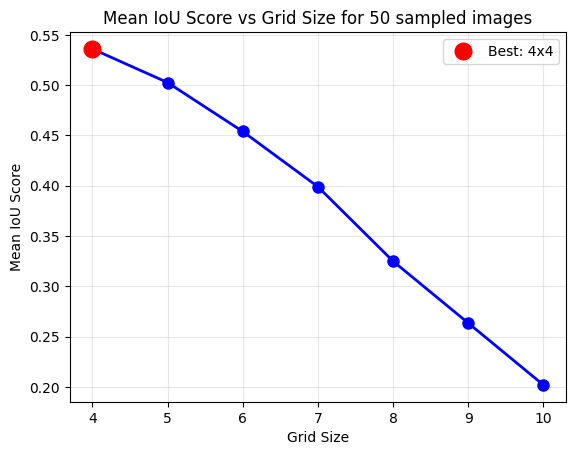

In [88]:
df_sorted = stats.sort_values('grid_size')
grid_sizes = df_sorted['grid_size'].tolist()
mean_ious = df_sorted['mean_iou'].tolist()

plt.plot(grid_sizes, mean_ious, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Grid Size')
plt.ylabel('Mean IoU Score')
plt.title('Mean IoU Score vs Grid Size for 50 sampled images')
plt.grid(True, alpha=0.3)
plt.xticks(grid_sizes)

# Highlight best grid size
best_idx = df_sorted['mean_iou'].idxmax()
best_grid_size = df_sorted.loc[best_idx, 'grid_size']
best_mean_iou = df_sorted.loc[best_idx, 'mean_iou']

plt.plot(best_grid_size, best_mean_iou, 'ro', markersize=12,
         label=f'Best: {best_grid_size}x{best_grid_size}')
plt.legend()
plt.show()